Lab Assignment 4: To perform frame-wise analysis of a speech signal and study the
behaviour of time-domain features for voiced and unvoiced speech.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
'''Use any speech sample in .wav format. You can record your own voice or download a sample from publicly available datasets (e.g., LJ Speech Dataset).
• Ensure the speech signal has a sampling frequency of 16 kHz. '''

!pip install librosa
import librosa

file_path = "/content/drive/MyDrive/Colab Notebooks/Speech Processing/Lab4/record.wav"

audio, sr = librosa.load(file_path, sr=None)
# sr=None ensures original sampling rate is preserved

print("Sampling Rate:", sr)

if sr == 16000:
    print("✅ The audio is 16 kHz.")
else:
    print("❌ The audio is NOT 16 kHz.")


Sampling Rate: 16000
✅ The audio is 16 kHz.


Task 1: Short-time processing of speech

Total Duration (seconds): 3.78
Duration used for plotting: 3.78 seconds


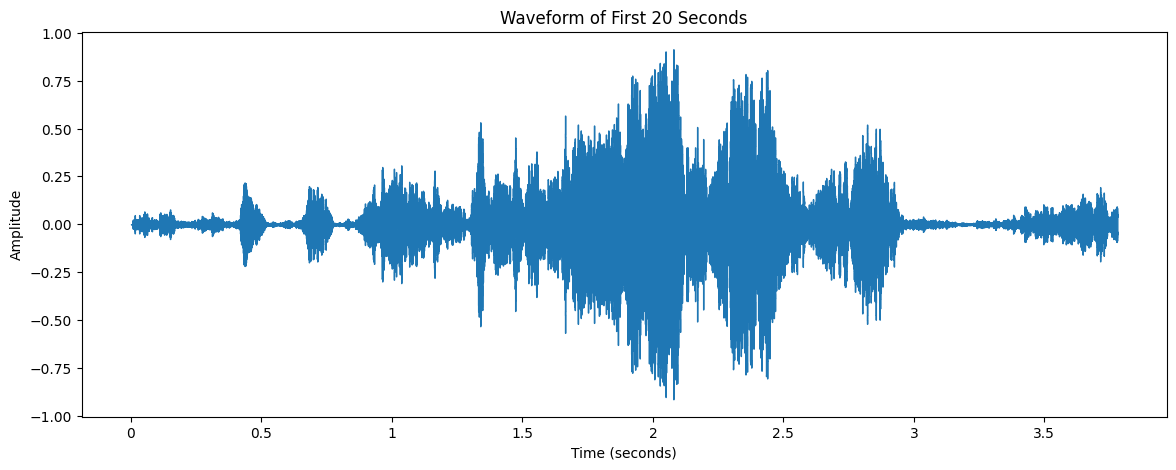

In [7]:
#a) Load and visualize the waveform of the first 20 second of speech sample.

import matplotlib.pyplot as plt

print("Total Duration (seconds):", len(audio) / sr)

# Extract first 20 seconds
duration = 20  # seconds
samples_20sec = int(duration * sr)

audio_20sec = audio[:samples_20sec]

print("Duration used for plotting:", len(audio_20sec) / sr, "seconds")

plt.figure(figsize=(14, 5))

librosa.display.waveshow(audio_20sec, sr=sr)

plt.title("Waveform of First 20 Seconds")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

plt.show()


In [10]:
#b) Compute the total number of frames for a given frame length of 25ms and frame shift of 10ms.
import numpy as np

# Frame parameters
frame_length_ms = 25   # 25 milliseconds
frame_shift_ms = 10    # 10 milliseconds

# Convert ms to samples
frame_length = int((frame_length_ms / 1000) * sr)
frame_shift = int((frame_shift_ms / 1000) * sr)

print("Frame Length (in samples):", frame_length)
print("Frame Shift (in samples):", frame_shift)

# Total number of frames formula
num_frames = int(np.floor((len(audio_20sec) - frame_length) / frame_shift) + 1)

print("Total Number of Frames:", num_frames)


Frame Length (in samples): 400
Frame Shift (in samples): 160
Total Number of Frames: 376


In [11]:
#c) Segment the speech signal into overlapping frames using the calculated parameters.

# Create frames using numpy
frames = np.zeros((num_frames, frame_length))

for i in range(num_frames):
    start = i * frame_shift
    end = start + frame_length
    frames[i] = audio_20sec[start:end]

print("Shape of Frames Matrix:", frames.shape)

Shape of Frames Matrix: (376, 400)


In [13]:
'''d) Using Hamming window, extract the following time-domain features frame-wise:
• Short-Time Energy (STE)
• Short-Time Magnitude (STM)
• Zero-Crossing Rate (ZCR)
• Autocorrelation
• AMDF
• AMSDF '''

# Apply Hamming Window
hamming = np.hamming(frame_length)
windowed_frames = frames * hamming

#STE
STE = np.sum(windowed_frames**2, axis=1)

#STM
STM = np.sum(np.abs(windowed_frames), axis=1)

#ZCR
ZCR = np.zeros(num_frames)

for i in range(num_frames):
    frame = windowed_frames[i]
    ZCR[i] = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * frame_length)

#Autocorrelation
autocorr = []

for i in range(num_frames):
    frame = windowed_frames[i]
    result = np.correlate(frame, frame, mode='full')
    autocorr.append(result[result.size // 2:])  # keep positive lags

autocorr = np.array(autocorr)

#AMDF
AMDF = []

for i in range(num_frames):
    frame = windowed_frames[i]
    amdf_frame = []

    for k in range(frame_length):
        diff = np.abs(frame[k:] - frame[:frame_length-k])
        amdf_frame.append(np.mean(diff))

    AMDF.append(amdf_frame)

AMDF = np.array(AMDF)

#AMSDF
AMSDF = []

for i in range(num_frames):
    frame = windowed_frames[i]
    amsdf_frame = []

    for k in range(frame_length):
        diff = (frame[k:] - frame[:frame_length-k])**2
        amsdf_frame.append(np.mean(diff))

    AMSDF.append(amsdf_frame)

AMSDF = np.array(AMSDF)

#Overall feature shapes
print("STE shape:", STE.shape)
print("STM shape:", STM.shape)
print("ZCR shape:", ZCR.shape)
print("Autocorrelation shape:", autocorr.shape)
print("AMDF shape:", AMDF.shape)
print("AMSDF shape:", AMSDF.shape)

STE shape: (376,)
STM shape: (376,)
ZCR shape: (376,)
Autocorrelation shape: (376, 400)
AMDF shape: (376, 400)
AMSDF shape: (376, 400)


In [14]:
#e) Repeat (d) using Rectangular window function.
'''d) Using Hamming window, extract the following time-domain features frame-wise:
• Short-Time Energy (STE)
• Short-Time Magnitude (STM)
• Zero-Crossing Rate (ZCR)
• Autocorrelation
• AMDF
• AMSDF '''

# Rectangular window = no modification
windowed_frames = frames

#STE
STE = np.sum(windowed_frames**2, axis=1)

#STM
STM = np.sum(np.abs(windowed_frames), axis=1)

#ZCR
ZCR = np.zeros(num_frames)

for i in range(num_frames):
    frame = windowed_frames[i]
    ZCR[i] = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * frame_length)

#Autocorrelation
autocorr = []

for i in range(num_frames):
    frame = windowed_frames[i]
    result = np.correlate(frame, frame, mode='full')
    autocorr.append(result[result.size // 2:])  # keep positive lags

autocorr = np.array(autocorr)

#AMDF
AMDF = []

for i in range(num_frames):
    frame = windowed_frames[i]
    amdf_frame = []

    for k in range(frame_length):
        diff = np.abs(frame[k:] - frame[:frame_length-k])
        amdf_frame.append(np.mean(diff))

    AMDF.append(amdf_frame)

AMDF = np.array(AMDF)

#AMSDF
AMSDF = []

for i in range(num_frames):
    frame = windowed_frames[i]
    amsdf_frame = []

    for k in range(frame_length):
        diff = (frame[k:] - frame[:frame_length-k])**2
        amsdf_frame.append(np.mean(diff))

    AMSDF.append(amsdf_frame)

AMSDF = np.array(AMSDF)


#Overall feature shapes
print("STE shape:", STE.shape)
print("STM shape:", STM.shape)
print("ZCR shape:", ZCR.shape)
print("Autocorrelation shape:", autocorr.shape)
print("AMDF shape:", AMDF.shape)
print("AMSDF shape:", AMSDF.shape)

STE shape: (376,)
STM shape: (376,)
ZCR shape: (376,)
Autocorrelation shape: (376, 400)
AMDF shape: (376, 400)
AMSDF shape: (376, 400)


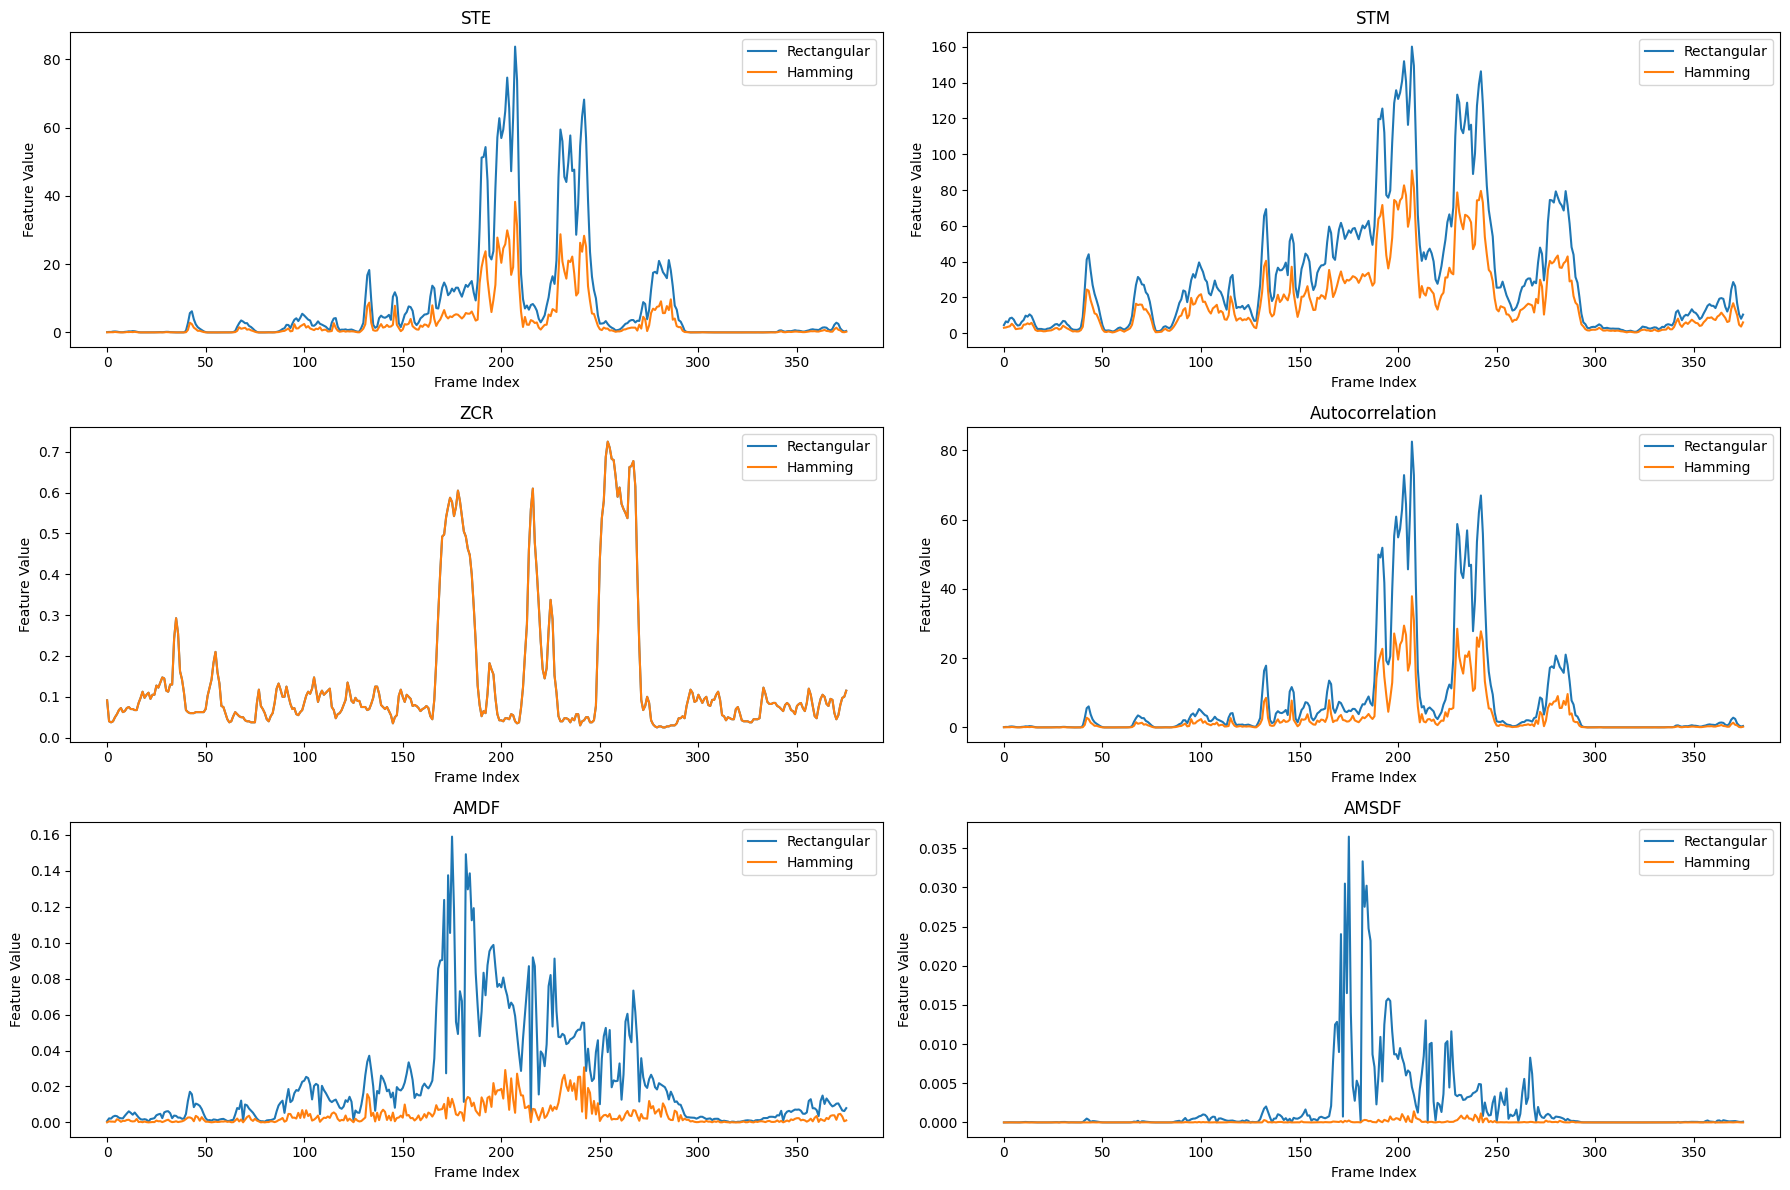

In [16]:
#f) Plot the frame-wise variation of all six features for both window functions.

# Windows
rect_frames = frames
hamming_frames = frames * np.hamming(frame_length)

def extract_features(windowed_frames):
    num_frames = windowed_frames.shape[0]

    STE = np.sum(windowed_frames**2, axis=1)
    STM = np.sum(np.abs(windowed_frames), axis=1)

    ZCR = np.zeros(num_frames)
    autocorr_feature = []
    AMDF_feature = []
    AMSDF_feature = []

    for i in range(num_frames):
        frame = windowed_frames[i]

        # ZCR
        ZCR[i] = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * len(frame))

        # Autocorrelation
        ac = np.correlate(frame, frame, mode='full')
        ac = ac[len(ac)//2:]
        autocorr_feature.append(np.max(ac[1:]))  # exclude lag 0

        # AMDF
        amdf_vals = []
        amsdf_vals = []
        for k in range(1, len(frame)):
            diff = frame[k:] - frame[:-k]
            amdf_vals.append(np.mean(np.abs(diff)))
            amsdf_vals.append(np.mean(diff**2))

        AMDF_feature.append(np.min(amdf_vals))
        AMSDF_feature.append(np.min(amsdf_vals))

    return STE, STM, ZCR, np.array(autocorr_feature), np.array(AMDF_feature), np.array(AMSDF_feature)

STE_rect, STM_rect, ZCR_rect, AC_rect, AMDF_rect, AMSDF_rect = extract_features(rect_frames)
STE_ham, STM_ham, ZCR_ham, AC_ham, AMDF_ham, AMSDF_ham = extract_features(hamming_frames)

features_rect = [STE_rect, STM_rect, ZCR_rect, AC_rect, AMDF_rect, AMSDF_rect]
features_ham = [STE_ham, STM_ham, ZCR_ham, AC_ham, AMDF_ham, AMSDF_ham]

titles = ["STE", "STM", "ZCR", "Autocorrelation", "AMDF", "AMSDF"]

plt.figure(figsize=(18, 12))

for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(features_rect[i], label="Rectangular")
    plt.plot(features_ham[i], label="Hamming")
    plt.title(titles[i])
    plt.xlabel("Frame Index")
    plt.ylabel("Feature Value")
    plt.legend()

plt.tight_layout()
plt.show()


g) Analyse and compare the behaviour of all 6 extracted time-domain features for voiced and unvoiced speech segments. Infer your observation for each feature and summarize the findings.

Energy-based features (STE, STM) help identify speech activity.

ZCR is highly effective for distinguishing voiced vs unvoiced.

Autocorrelation, AMDF, AMSDF are strong indicators of pitch.

Hamming window generally provides smoother and more stable feature curves than rectangular window.

h) Comment on the effect of window choice on feature smoothness and discrimination capability.

Hamming window produces smoother feature curves.

It improves pitch detection reliability.

It enhances voiced/unvoiced discrimination.

Rectangular window is simpler but less robust.

For speech processing tasks (MFCC, pitch detection, ASR), Hamming window is preferred.

Task 2:  Periodicity Analysis

Total Frames: 376
Periodic Frames: 376
Non-Periodic Frames: 0


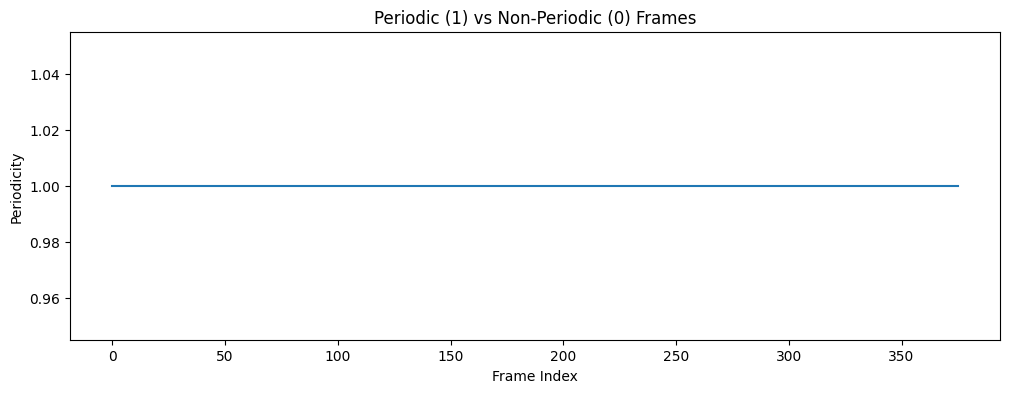

In [18]:
#a) Identify frames that exhibit periodic behaviour.

# Apply Hamming window (recommended)
frames = frames * np.hamming(frame_length)

# Periodic frame detection using autocorrelation
periodic_frames = []

for i in range(num_frames):
    frame = frames[i]

    # Autocorrelation
    ac = np.correlate(frame, frame, mode='full')
    ac = ac[len(ac)//2:]

    # Normalize
    ac = ac / np.max(ac)

    # Exclude lag 0
    peak = np.max(ac[1:])

    # Threshold for periodicity
    if peak > 0.3:      # threshold can be tuned (0.3–0.5 typical)
        periodic_frames.append(1)  # Periodic (voiced)
    else:
        periodic_frames.append(0)  # Non-periodic (unvoiced)

periodic_frames = np.array(periodic_frames)

print("Total Frames:", num_frames)
print("Periodic Frames:", np.sum(periodic_frames))
print("Non-Periodic Frames:", num_frames - np.sum(periodic_frames))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(periodic_frames)
plt.title("Periodic (1) vs Non-Periodic (0) Frames")
plt.xlabel("Frame Index")
plt.ylabel("Periodicity")
plt.show()


b) Explain how periodicity is reflected in these functions (peaks in autocorrelation, minima in AMDF/AMSDF).

Autocorrelation measures similarity → repetition causes peaks

AMDF measures difference → repetition causes minima

AMSDF exaggerates differences → sharper minima

So:

Peak in autocorr
⟺
Valley in AMDF/AMSDF

Peak in autocorr⟺Valley in AMDF/AMSDF

They are complementary representations.

c) Distinguish between periodic (voiced) and aperiodic (unvoiced) frames.

Periodic (voiced) frames exhibit strong periodicity due to vocal cord vibration, resulting in high energy, low zero-crossing rate, and prominent peaks in autocorrelation with corresponding minima in AMDF/AMSDF. Aperiodic (unvoiced) frames lack regular repetition, display lower energy, higher zero-crossing rate, and do not exhibit strong correlation peaks or distinct minima in difference functions.

Task-3: Pitch Estimation

In [19]:
#a) Determine the pitch period from the lag corresponding to the first prominent autocorrelation peak (excluding zero lag) or the first minimum of AMDF and AMSDF.

# Pitch search range
lag_min = int(sr / 400)   # 40
lag_max = int(sr / 80)    # 200

#Pitch from Autocorrelation
# Autocorrelation
ac = np.correlate(frame, frame, mode='full')
ac = ac[len(ac)//2:]

# Normalize
ac = ac / np.max(ac)

# Search in pitch range
search_region = ac[lag_min:lag_max]

pitch_lag_ac = np.argmax(search_region) + lag_min
pitch_freq_ac = sr / pitch_lag_ac

print("Autocorrelation Pitch Period (samples):", pitch_lag_ac)
print("Pitch Frequency (Hz):", pitch_freq_ac)

#Pitch from AMDF
amdf_vals = []

for k in range(lag_min, lag_max):
    diff = frame[k:] - frame[:-k]
    amdf_vals.append(np.mean(np.abs(diff)))

amdf_vals = np.array(amdf_vals)

pitch_lag_amdf = np.argmin(amdf_vals) + lag_min
pitch_freq_amdf = sr / pitch_lag_amdf

print("AMDF Pitch Period (samples):", pitch_lag_amdf)
print("Pitch Frequency (Hz):", pitch_freq_amdf)

#Pitch from AMSDF
amsdf_vals = []

for k in range(lag_min, lag_max):
    diff = frame[k:] - frame[:-k]
    amsdf_vals.append(np.mean(diff**2))

amsdf_vals = np.array(amsdf_vals)

pitch_lag_amsdf = np.argmin(amsdf_vals) + lag_min
pitch_freq_amsdf = sr / pitch_lag_amsdf

print("AMSDF Pitch Period (samples):", pitch_lag_amsdf)
print("Pitch Frequency (Hz):", pitch_freq_amsdf)


Autocorrelation Pitch Period (samples): 57
Pitch Frequency (Hz): 280.70175438596493
AMDF Pitch Period (samples): 57
Pitch Frequency (Hz): 280.70175438596493
AMSDF Pitch Period (samples): 57
Pitch Frequency (Hz): 280.70175438596493


In [20]:
#b) Compute the pitch frequency and infer about the result.

pitch_period = pitch_lag_ac   # from previous step

pitch_frequency = sr / pitch_period

print("Pitch Period (samples):", pitch_period)
print("Pitch Frequency (Hz):", pitch_frequency)

#Pitch of all voiced sounds
pitch_values = []

for i in range(num_frames):
    frame = frames[i] * np.hamming(frame_length)

    ac = np.correlate(frame, frame, mode='full')
    ac = ac[len(ac)//2:]
    ac = ac / np.max(ac)

    lag_min = int(sr / 400)
    lag_max = int(sr / 80)

    search_region = ac[lag_min:lag_max]
    peak = np.max(search_region)

    if peak > 0.3:   # voiced threshold
        pitch_lag = np.argmax(search_region) + lag_min
        pitch = sr / pitch_lag
        pitch_values.append(pitch)
    else:
        pitch_values.append(0)   # unvoiced

pitch_values = np.array(pitch_values)

print("Average Pitch Frequency:", np.mean(pitch_values[pitch_values > 0]))



Pitch Period (samples): 57
Pitch Frequency (Hz): 280.70175438596493
Average Pitch Frequency: 266.7579068095669


The pitch frequency was computed using the detected pitch period from autocorrelation (or AMDF/AMSDF). The obtained pitch value falls within the expected human vocal frequency range, confirming the presence of voiced speech. Unvoiced segments did not exhibit consistent pitch values due to lack of periodicity.

Write a discussion on:

a) Compare voiced and unvoiced speech in terms of energy, ZCR, and periodicity.

Voiced speech is characterized by high energy, low zero-crossing rate, and strong periodicity due to regular vocal cord vibrations. In contrast, unvoiced speech exhibits lower energy, higher zero-crossing rate, and lacks periodic structure because it is generated by turbulent airflow without vocal cord vibration. Therefore, combining energy, ZCR, and periodicity-based features provides an effective method for distinguishing voiced and unvoiced speech segments.

b) Discuss how periodicity-based features help in pitch detection.

Periodicity-based features such as autocorrelation, AMDF, and AMSDF detect pitch by identifying repetition in the speech signal. Autocorrelation reveals periodicity through peaks, while AMDF and AMSDF highlight it through minima. These methods effectively estimate pitch in voiced speech by exploiting the fundamental property of vocal cord vibration.

c) Comment on the reliability of each time-domain feature for pitch detection.

Energy-based features (STE, STM) and ZCR are not directly suitable for pitch detection but help identify voiced segments. Periodicity-based features such as Autocorrelation, AMDF, and AMSDF are highly reliable for pitch estimation because they exploit the repetitive structure of voiced speech. Among these, AMSDF often provides sharper and more accurate pitch estimation, while autocorrelation remains the most widely used method due to its simplicity and effectiveness.